<a href="https://colab.research.google.com/github/demekeendalie/Fine-tuning-bert-model-for-amharic-news-classification/blob/main/Bag_of_word_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#importing basic packages
import pandas as pd
import numpy as np
import tensorflow as tf

In [20]:
import os
dataset_path = 'C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small'

data = []
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    print(category_path)
    # Check if it's a directory (category folder)
    if os.path.isdir(category_path):
        for filename in os.listdir(category_path)[:8000]:
            if filename.endswith('.txt'):
                file_path = os.path.join(category_path, filename)
                try:
                    with open(file_path, 'r', encoding='utf-8') as file:
                        article_text = file.read().strip()  # Read and remove leading/trailing spaces
                        data.append({'articles': article_text, 'category': category})
                except Exception as e:
                    print(f"Error reading file {file_path}: {e}")

dataframe = pd.DataFrame(data)

C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Avto
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Ayollar
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Iqtisodiyot
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Jinoyat
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Madaniyat
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Pazandachilik
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Qonunchilik
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Salomatlik
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Siyosat
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Sport
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Texnologiya


In [21]:
print(dataframe)
category_counts = dataframe['category'].value_counts()
print(category_counts)

                                                articles     category
0      Tesla barcha elektromobillarining narxini oshi...         Avto
1      UzAuto Motors — o‘rindiq isitish modeli va mag...         Avto
2      Lego’ning 358 mingdan ortiq detali yordamida t...         Avto
3      Namanganda “Moskvich” ariqqa ag‘darilib ketish...         Avto
4      Qo‘qonda YPX xodimini mashina ustida sudrab ke...         Avto
...                                                  ...          ...
68022  Rossiya TIVga xakerlik hujumi uyushtirildi\n\n...  Texnologiya
68023  Smartfonlarning batareyalari nega portlaydi?\n...  Texnologiya
68024  Eng kichkina sensorli telefon ishlab chiqarild...  Texnologiya
68025  Xitoyning eng badavlat kishilaridan biri 25 yo...  Texnologiya
68026  Kodak Ektra - retro uslubidagi kamerofon\n\nKo...  Texnologiya

[68027 rows x 2 columns]
Iqtisodiyot      8000
Madaniyat        8000
Qonunchilik      8000
Siyosat          8000
Sport            8000
Texnologiya      8000
Av

In [22]:
# changing category to numeric
label=pd.Categorical(dataframe['category']).codes
label=pd.DataFrame(label)
dataframe['labels']=pd.DataFrame(label)
print(dataframe)

unique_category_labels = dataframe[['category', 'labels']].drop_duplicates()
print(unique_category_labels)

                                                articles     category  labels
0      Tesla barcha elektromobillarining narxini oshi...         Avto       0
1      UzAuto Motors — o‘rindiq isitish modeli va mag...         Avto       0
2      Lego’ning 358 mingdan ortiq detali yordamida t...         Avto       0
3      Namanganda “Moskvich” ariqqa ag‘darilib ketish...         Avto       0
4      Qo‘qonda YPX xodimini mashina ustida sudrab ke...         Avto       0
...                                                  ...          ...     ...
68022  Rossiya TIVga xakerlik hujumi uyushtirildi\n\n...  Texnologiya      10
68023  Smartfonlarning batareyalari nega portlaydi?\n...  Texnologiya      10
68024  Eng kichkina sensorli telefon ishlab chiqarild...  Texnologiya      10
68025  Xitoyning eng badavlat kishilaridan biri 25 yo...  Texnologiya      10
68026  Kodak Ektra - retro uslubidagi kamerofon\n\nKo...  Texnologiya      10

[68027 rows x 3 columns]
            category  labels
0        

In [23]:
# mixing each categories and thier labels
dataframe=dataframe.sample(frac=1)

In [24]:
dataframe['word_len'] = dataframe['articles'].str.split().str.len()
print(dataframe['word_len'].mean())

mean_word_len_by_category = dataframe.groupby('category', as_index=False)['word_len'].mean()
print(mean_word_len_by_category)

279.0103782321725
         category    word_len
0            Avto  152.877234
1         Ayollar  270.330072
2     Iqtisodiyot  264.641375
3         Jinoyat  180.932619
4       Madaniyat  221.693750
5   Pazandachilik   61.512255
6     Qonunchilik  783.223000
7      Salomatlik  256.870035
8         Siyosat  241.980250
9           Sport  186.161000
10    Texnologiya  195.568000


In [25]:
#normalizarion
import re
#method to normalize character level missmatch such as ጸሀይ and ፀሐይ
def normalization(input_token):
    rep1=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_token)
    rep2=re.sub('[ሑኁዅ]','ሁ',rep1)
   
    return rep2

In [26]:
# apply normalization and special characters removal
dataframe['articles']=dataframe['articles'].apply(lambda x: normalization(x))

In [27]:
# special symbol removal
# dataframe['articles']=dataframe['articles'].str.replace('[^\w\s]','',regex=True)
dataframe['articles']=dataframe['articles'].str.replace("O'",'O‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace("G'",'G‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace("o'",'o‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace("g'",'g‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace('O`','O‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace('G`','G‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace('o`','o‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace('g`','g‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace("[^\w\s‘’`']",'',regex=True)
dataframe['articles'] = dataframe['articles'].str.replace('\n\n', '. ', regex=False)
dataframe['articles'] = dataframe['articles'].str.replace('\n', '. ', regex=False)

In [28]:
# removing digits from the dataset
dataframe['articles']=dataframe['articles'].str.replace('\d+','',regex=True)

In [29]:
print(dataframe)

                                                articles     category  labels  \
33040  O‘zbekiston Respublikasi Investitsiyalar va ta...  Qonunchilik       6   
49412  O‘zbekiston Prezidenti Pokiston Bosh vaziri bi...      Siyosat       8   
3315   O‘zbek avtosanoatida mahsulot ishlab chiqarish...         Avto       0   
5639   Farg‘onada yo‘l chetida to‘xtab turgan ZIL tir...         Avto       0   
57272  O‘zbek qizi Erondagi musobaqaning eng yaxshi s...        Sport       9   
...                                                  ...          ...     ...   
33289  Biotexnologiyalarni rivojlantirish va mamlakat...  Qonunchilik       6   
62429  iPhone  Pro bir oy davomida ko‘l ostida yotdi ...  Texnologiya      10   
45211  Toshkentning bir qator tumanlari hokimlari tay...      Siyosat       8   
39197  Shifo maslahat HOMILADOR BO‘LOLMASLIGIM VAZNIM...   Salomatlik       7   
27598  Garri Potterning birinchi nashri Londondagi au...    Madaniyat       4   

       word_len  
33040    

In [30]:
dataframe=dataframe[['articles','labels']]

In [31]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(dataframe['articles'],dataframe['labels'], test_size=0.20, random_state=42)

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
# Create a Bag-of-Words   model
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [33]:
# create mlp classifier
clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=50, verbose=True)

clf.fit(X_train_vec, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_vec)
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro')) # Changed line: Added average='macro'
print("Recall:", recall_score(y_test, y_pred,average='macro')) # Changed line: Added average='macro'
print("F1-score:", f1_score(y_test, y_pred,average='macro')) # Changed line: Added average='macro'
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

Iteration 1, loss = 0.36403193
Iteration 2, loss = 0.05038071
Iteration 3, loss = 0.02361505
Iteration 4, loss = 0.01652478
Iteration 5, loss = 0.01239739
Iteration 6, loss = 0.01296709
Iteration 7, loss = 0.00908436
Iteration 8, loss = 0.00812937
Iteration 9, loss = 0.00850189
Iteration 10, loss = 0.00854429
Iteration 11, loss = 0.00544753
Iteration 12, loss = 0.00654473
Iteration 13, loss = 0.00548038
Iteration 14, loss = 0.00691816
Iteration 15, loss = 0.00689089
Iteration 16, loss = 0.00775611
Iteration 17, loss = 0.00763575
Iteration 18, loss = 0.02170941
Iteration 19, loss = 0.01263156
Iteration 20, loss = 0.01026716
Iteration 21, loss = 0.00603550
Iteration 22, loss = 0.00428007
Iteration 23, loss = 0.00377587
Iteration 24, loss = 0.00315540
Iteration 25, loss = 0.00445467
Iteration 26, loss = 0.00299207
Iteration 27, loss = 0.00316462
Iteration 28, loss = 0.00421462
Iteration 29, loss = 0.01116682
Iteration 30, loss = 0.01052613
Iteration 31, loss = 0.01527726
Iteration 32, los

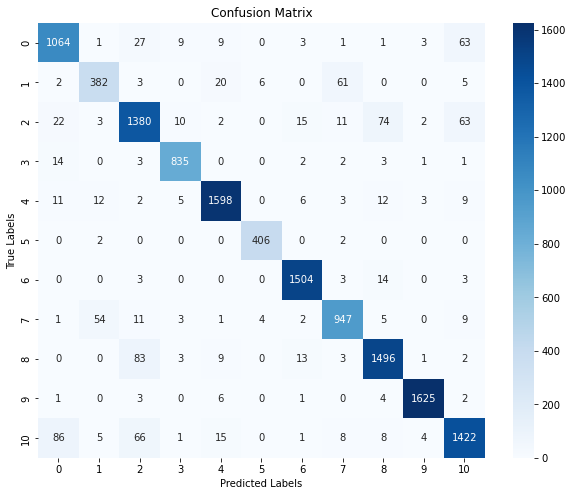

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

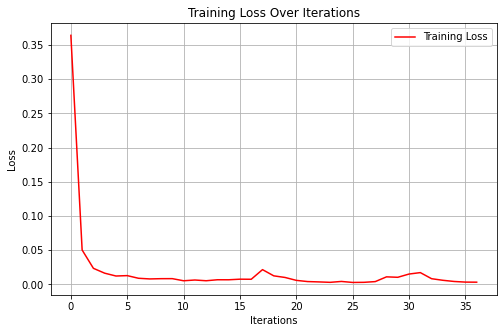

In [35]:
import matplotlib.pyplot as plt

# Plotting the training loss curve
plt.figure(figsize=(8, 5))
plt.plot(clf.loss_curve_, label='Training Loss', color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Over Iterations')
plt.grid(True)
plt.legend()
plt.show()

C:\Users\E-MaxPCShop\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\E-MaxPCShop\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\E-MaxPCShop\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\E-MaxPCShop\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\E-MaxPCShop\anaconda3\lib\site-packages\sklearn

C:\Users\E-MaxPCShop\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\E-MaxPCShop\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\E-MaxPCShop\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\E-MaxPCShop\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\E-MaxPCShop\anaconda3\lib\site-packages\sklearn

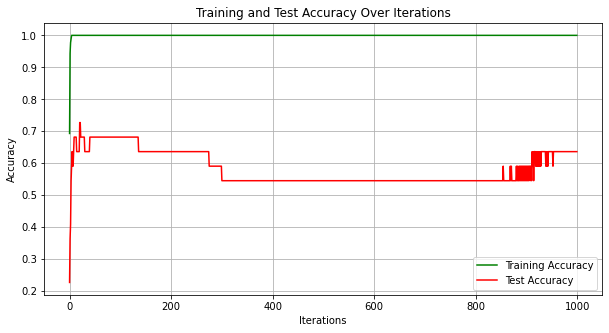

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize classifier
clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, warm_start=True, verbose=False)

# Tracking accuracies
train_acc = []
test_acc = []

# Training loop to track accuracy over iterations
for i in range(1000):  # Matches your max_iter
    clf.fit(X_train_vec, y_train)
    
    train_acc.append(clf.score(X_train_vec, y_train))
    test_acc.append(clf.score(X_test_vec, y_test))

# Plotting accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Training Accuracy', color='green')
plt.plot(test_acc, label='Test Accuracy', color='red')
plt.title('Training and Test Accuracy Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()